In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
img0 = cv2.imread("dataset-sirenlight/positive/sirenlight00000.png")
img1 = cv2.imread("dataset-sirenlight/positive/sirenlight00001.png")

img0_rgb = cv2.cvtColor(img0,cv2.COLOR_BGR2RGB)
img0_hsv = cv2.cvtColor(img0,cv2.COLOR_BGR2HSV)

img1_rgb = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1_hsv = cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)

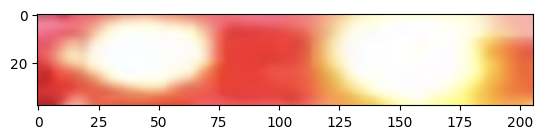

In [5]:
plt.imshow(img0_rgb)

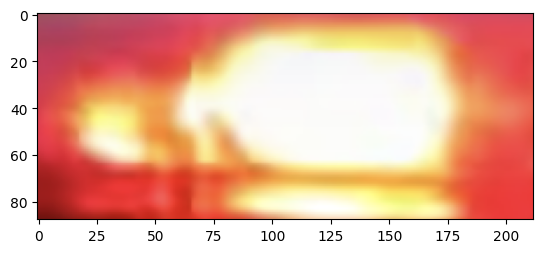

In [6]:
plt.imshow(img1_rgb)

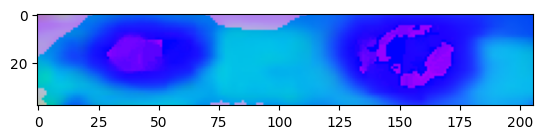

In [7]:
plt.imshow(img0_hsv)

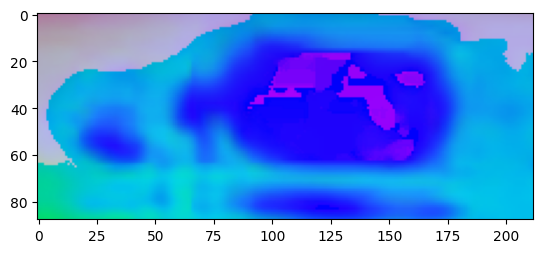

In [8]:
plt.imshow(img1_hsv)

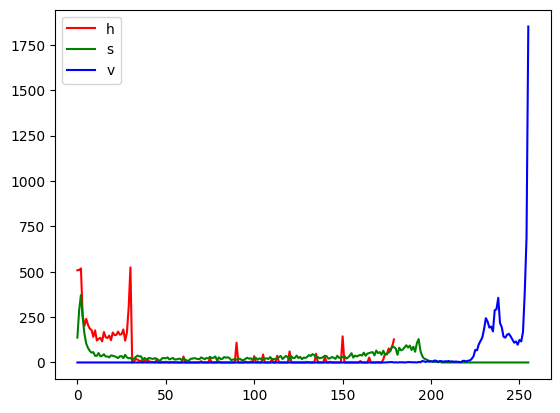

In [22]:
h, s, v = img0_hsv[:,:,0], img0_hsv[:,:,1], img0_hsv[:,:,2]
hist0_h = cv2.calcHist([h],[0],None,[180],[0,180])
hist0_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist0_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist0_h, color='r', label="h")
plt.plot(hist0_s, color='g', label="s")
plt.plot(hist0_v, color='b', label="v")
plt.legend()
plt.show()

In [10]:
len(hist0_v)

256

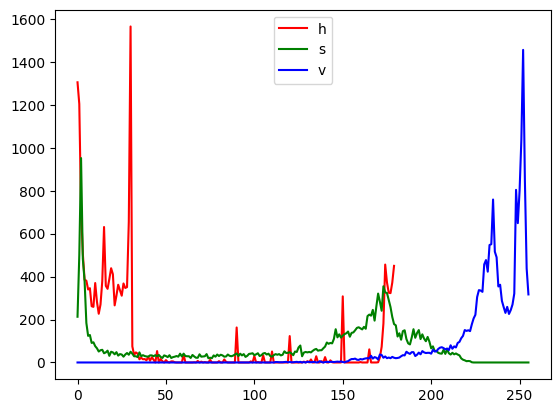

In [23]:
h, s, v = img1_hsv[:,:,0], img1_hsv[:,:,1], img1_hsv[:,:,2]
hist1_h = cv2.calcHist([h],[0],None,[180],[0,180])
hist1_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist1_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist1_h, color='r', label="h")
plt.plot(hist1_s, color='g', label="s")
plt.plot(hist1_v, color='b', label="v")
plt.legend()
plt.show()

In [12]:
len(hist1_v)

256

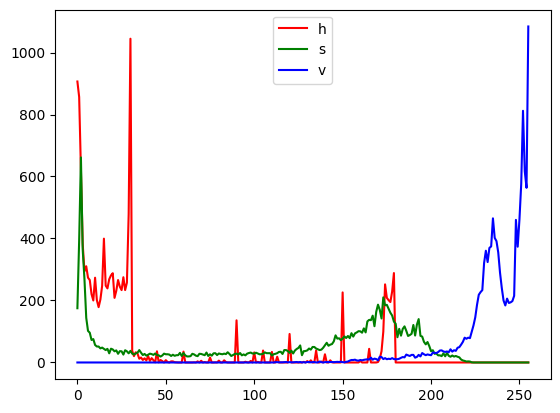

In [13]:
hist_combined_h = (hist0_h + hist1_h)/2
hist_combined_s = (hist0_s + hist1_s)/2
hist_combined_v = (hist0_v + hist1_v)/2
plt.plot(hist_combined_h, color='r', label="h")
plt.plot(hist_combined_s, color='g', label="s")
plt.plot(hist_combined_v, color='b', label="v")
plt.legend()
plt.show()

In [14]:
len(hist_combined_v)

256

In [15]:
hist0 = cv2.calcHist([img0_hsv], [0,1], None, [180,256], [0,180,0, 256])
cv2.normalize(hist0, hist0, 0, 1, cv2.NORM_MINMAX)

hist1 = cv2.calcHist([img1_hsv], [0,1], None, [180,256], [0,180,0, 256])
cv2.normalize(hist1, hist1, 0, 1, cv2.NORM_MINMAX)

array([[0.5620053 , 0.1530343 , 0.17414248, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [16]:
ret = cv2.compareHist(hist0, hist1, cv2.HISTCMP_INTERSECT)
ret = ret/np.sum(hist0)
print(ret)

0.4085088923126624


In [17]:
ret = cv2.compareHist(hist0, hist0, cv2.HISTCMP_INTERSECT)
ret = ret/np.sum(hist0)
print(ret)

1.0000000360215318


# Take the average of 300 sirenlight images

Text(0.5, 1.0, 'Value (Brightness)')

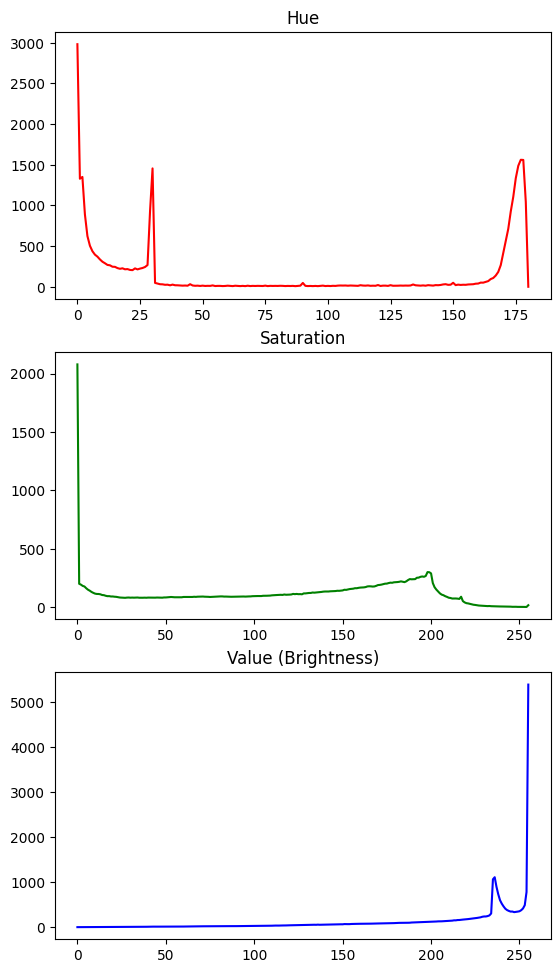

In [24]:
import os
dir = "dataset-sirenlight/positive/"

# hsv_combined = 0
hist_combined_h = 0
hist_combined_s = 0
hist_combined_v = 0

images_list = [os.path.join(dir, filename) for filename in os.listdir(dir) if not filename.startswith('.')]

for img_path in images_list:
    img = cv2.imread(img_path)
    img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    img_hsv = cv2.resize(img_hsv, (300,100))
    # hsv_combined += img_hsv
    h, s, v = img_hsv[:,:,0], img_hsv[:,:,1], img_hsv[:,:,2]
    hist_combined_h += cv2.calcHist([h],[0],None,[181],[0,181])
    hist_combined_s += cv2.calcHist([s],[0],None,[256],[0,256])
    hist_combined_v += cv2.calcHist([v],[0],None,[256],[0,256])

# hsv_combined /= 300
hist_combined_h /= 300
hist_combined_s /= 300
hist_combined_v /= 300
fig, axs = plt.subplots(3)
fig.subplots_adjust(top=2)
axs[0].plot(hist_combined_h, color='r', label="h")
axs[0].set_title("Hue")
axs[1].plot(hist_combined_s, color='g', label="s")
axs[1].set_title("Saturation")
axs[2].plot(hist_combined_v, color='b', label="v")
axs[2].set_title("Value (Brightness)")

# plt.plot(hist_combined_h, color='r', label="h")
# plt.plot(hist_combined_s, color='g', label="s")
# plt.plot(hist_combined_v, color='b', label="v")
# plt.legend()
# plt.show()

# HSV color extraction

## Set lower and upper bound

In [97]:
# Manaully set lower and uppder bounds based on hsv histogram
# H - 색상
# S - 0에 가까울 수록 하얀색, 255에 가까울 수록 H 색상
# V - 0에 가까울 수록 검은색, 255에 가까울 수록 H 색상

# 1)
# hsv_lower1 = np.array([0, 0, 230])
# hsv_upper1 = np.array([26, 180, 255])
# hsv_lower2 = np.array([160, 180, 230])
# hsv_upper2 = np.array([180, 220, 255])

# 2)
# hsv_lower1 = np.array([0, 0, 230])
# hsv_upper1 = np.array([26, 255, 255])
# hsv_lower2 = np.array([160, 0, 230])
# hsv_upper2 = np.array([180, 255, 255])

# 3)
# hsv_lower1 = np.array([0, 0, 225])
# hsv_upper1 = np.array([26, 255, 255])
# hsv_lower2 = np.array([160, 0, 225])
# hsv_upper2 = np.array([180, 255, 255])

# 4)
# hsv_lower1 = np.array([0, 0, 225])
# hsv_upper1 = np.array([30, 255, 255])
# hsv_lower2 = np.array([160, 0, 225])
# hsv_upper2 = np.array([180, 255, 255])

# 5)
hsv_lower1 = np.array([0, 0, 225])
hsv_upper1 = np.array([40, 255, 255])
hsv_lower2 = np.array([160, 0, 225])
hsv_upper2 = np.array([180, 255, 255])

## Test with positive image

Number of pixels: 7828
Number of pixels falls into the range: 6921
Percentage: 0.8841338783852836


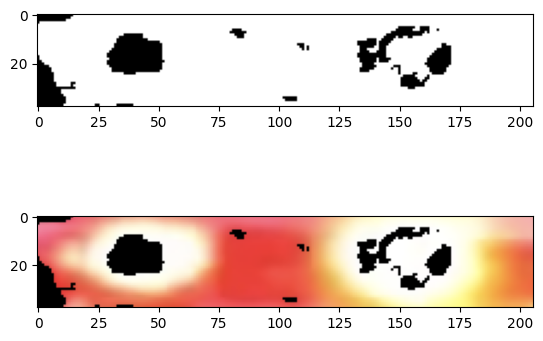

In [100]:
''' 
After calling cv2.inRange, a binary mask is returned,
where white pixels (255) represent pixels that fall into the upper and lower limit range and black pixels (0) do not.
'''
hsv_mask1 = cv2.inRange(img0_hsv, hsv_lower1, hsv_upper1)
hsv_mask2 = cv2.inRange(img0_hsv, hsv_lower2, hsv_upper2)
hsv_mask = hsv_mask1 + hsv_mask2

total_pixels = img0_hsv.shape[0]*img0_hsv.shape[1]
print(f"Number of pixels: {total_pixels}")
pixels = cv2.countNonZero(hsv_mask)
print(f"Number of pixels falls into the range: {pixels}")
print(f"Percentage: {pixels/total_pixels}")

result = cv2.bitwise_and(img0_rgb, img0_rgb, mask=hsv_mask)

f, axarr = plt.subplots(2,1)

axarr[0].imshow(hsv_mask,cmap='gray')
axarr[1].imshow(result)

## Test with negative image

Number of pixels: 50397
Number of pixels falls into the range: 8036
Percentage: 0.15945393575014385


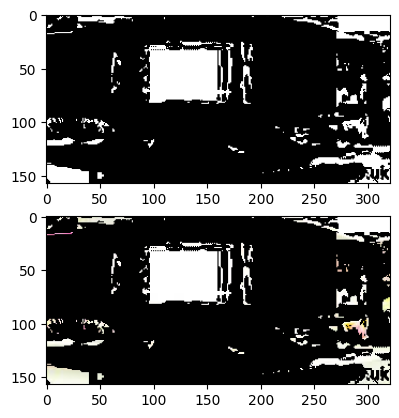

In [99]:
img_test = cv2.imread("dataset-sirenlight/negative/test.jpg")
img_test_rgb = cv2.cvtColor(img_test,cv2.COLOR_BGR2RGB)
img_test_hsv = cv2.cvtColor(img_test,cv2.COLOR_BGR2HSV)

hsv_mask1 = cv2.inRange(img_test_hsv, hsv_lower1, hsv_upper1)
hsv_mask2 = cv2.inRange(img_test_hsv, hsv_lower2, hsv_upper2)
hsv_mask = hsv_mask1 + hsv_mask2

total_pixels = img_test_hsv.shape[0]*img_test_hsv.shape[1]
print(f"Number of pixels: {total_pixels}")
pixels = cv2.countNonZero(hsv_mask)
print(f"Number of pixels falls into the range: {pixels}")
print(f"Percentage: {pixels/total_pixels}")

result = cv2.bitwise_and(img_test_rgb, img_test_rgb, mask=hsv_mask)

f, axarr = plt.subplots(2,1)

axarr[0].imshow(hsv_mask,cmap='gray')
axarr[1].imshow(result)